## 간략화

문서 가독성을 높이고자, 매력적인 출력 기능을 활성화한다.

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

### 간략화하기

이제 좀더 흥미로운 수학주제로 들어가보자.
기호조작시스템에 있어 가장 유용한 기능중 하나는 수학 표현식을 간략화할 수 있는 능력이다.
심파이는 다양한 유형의 간략화 작업을 수행하는 수십가지 함수를 제공한다.
이런 모든 함수를 `simplify()`라는 일반적인 함수를 통해 지능적인 방식으로 표현식을 가장 단순한 형태로 만들게 된다.
다음에 몇가지 예제가 나와 있다.

In [2]:
simplify(sin(x)**2 + cos(x)**2)

In [3]:
simplify((x**3 + x**2 - x - 1) /(x**2 + 2*x + 1))

In [4]:
simplify(gamma(x)/gamma(x-2))

`gamma(x)`는 $\Gamma (x)$ 감마함수다. `simplify()` 함수는 다양한 표현식 클래스를 처리할 수 있는 기능을 갖추고 있다.

하지만, `simplify()` 함수도 함정이 있다. 심파이에 주요한 간략화 연산에만 적용되고, 휴리스틱을 사용해서 가장 간략한 결과를 판단한다.
하지만, ''가장 간략한''이라는 말은 잘-정의된 용어는 아니다. 예를 들어 $x^2 + 2x + 1$을 ''단순화''하면 $(x + 1)^2$ 결과가 나와야만 된다.

In [5]:
simplify(x**2 + 2*x + 1)

원하는 결과가 도출되지 않는다. 이런 유형의 간략화를 수행하는 함수가 있다. `factor()`로 불리고 다음에 논의될 예정이다.

`simplify()` 함수의 또다른 함정은 불필요하게 느릴 수 있다는 점인데, 이유는 최선의 간략화를 선택하기 전에 많은 유형의 간략화를 시도해보기 때문이다. 이미 어떤 유형의 간략화가 좋은지 알고 있다면, 간략화를 바로 적용하는 특정한 간략화 함수를 바로 적용하는 것이 더 낫다.

`simplify()` 함수 대신에 특정 간략화 함수를 적용하는 것은 특정한 함수가 출력형태에 관해 일정부분 보장을 해준다는 장점도 있다.
아래 나온 각 함수별로 이점은 토의될 것이다. 예를 들어, `factor()` 함수를 유리수 계수를 갖는 다항식을 호출시키면, 다항식을 더이상 약분할 수 없는 기약 인수로 인수분해되는 것이 보장된다. `simplify()`는 그런 보장이 없다.
완전히 휴리스틱이라, 앞에서 살펴봤듯이, 심파이가 수행할 수 있는 가능 간략화를 놓치기도 한다.

`simplify()` 함수는 인터랙티브하게 사용될 때 가장 좋은데, 특히 표현식을 더 간략한 형태로 줄일 때 그렇다.
`simplify()` 함수가 반환하는 것을 보고 나서, 좀더 정교한 결과를 도출하는데 특정한 함수를 골라 적용시킨다.
표현식이 어떤 형태를 갖추어야 되는지 아무런 생각이 없는 경우에 유용한데 표현식을 간략화는데 온갖 함수가 다 필요하기 때문이다.

## 다항식 / 유리함수 간략화

### 전개

`expand()` 함수는 심파이에서 가장 일반적으로 사용되는 간략화 함수중 하나다.
전개함수는 다양한 응용사례가 있지만, 지금은 다항식을 전개하는데만 고려해본다. 예를 들어:

In [6]:
expand((x + 1)**2)

In [7]:
expand((x + 2)*(x - 3))

다항식이 주어지면, `expand()` 함수는 다항식을 단항식 합으로 구성된 정규형으로 표현한다.

`expand()` 함수는 간략화 함수처럼 들리지 않는다. 결국, 함수명 그자체에 드러나듯이, 전개함수는 표현식을 더 적게가 아니라 더 크게 만든다.
일반적인 경우 그렇지만, `expand()` 함수를 호출하게면 표현식이 더 줄어드는 경우가 있는데 소거가 되기 때문이다.



In [8]:
expand((x + 1)*(x - 2) - (x - 1)*x)

### 인수

`factor()` 함수는 다항식을 인자로 받아 유리수에 대해 더이상 약분할 수 없는 기약인수로 인수분해한다. 예를 들어:

In [9]:
factor(x**3 - x**2 + x - 1)

In [10]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

다항식을 보면, `factor()`는 `expand()`와 정반대다. `factor()`는 유리수에 대해 완전 다변량 인수분해 알고리즘을 사용한다.
`factor()`로 반환되는 각 인수가 나누어질 수 없도록 보장된다는 의미가 된다.

인수 그 자체에 관심을 두는 경우, `factor_list` 함수는 좀더 구조적인 출력결과를 반환시킨다.

In [11]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

엄밀한 의미에서 `factor`와 `expand` 함수에 입력이 굳이 다항식이 될 필요는 없음에 주목한다.
`factor`와 `expand` 함수는 어떤 유형의 표현식도 지능적으로 인수분해 혹은 전개할 수 있다.
(하지만, 입력이 유리수에 대한 다항식이 아닌 경우, 인수를 더이상 줄일 수 없게 되지 않을 수도 있음에 주목한다.)

In [12]:
expand((cos(x) + sin(x))**2)

In [13]:
factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)

### 수집 함수

`collect()` 함수는 표현식에 거듭제곱 항을 모은다. 예를 들어,

In [15]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [16]:
collect_expr = collect(expr, x)
collect_expr

`collect()` 함수는 `.coeff()` 메쏘드와 연계되면 특히 유용하게 사용된다.
`expr.coeff(x, n)` 함수는 `expr` 표현식에 `x**n` 거듭제곱 계수를 반환한다.

In [19]:
collect_expr.coeff(x, 2)

### 소거 함수

`cancel()` 함수는 유리함수를 인자로 받아 $frac{p}{q}$ 정규형으로 표현한다. $p$와 $q$는 공약수 없이 전개된 형태의 다항식으로,
$p$와 $q$의 계수는 분모를 갖지 않는다.(즉, 정수임).

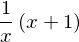

In [20]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

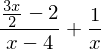

In [21]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

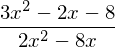

In [22]:
cancel(expr)

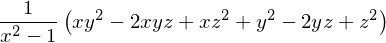

In [23]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 -2*y*z + z**2)/(x**2 -1)
expr

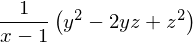

In [24]:
cancel(expr)

`factor()` 함수는 표현식 분모와 분자를 완전히 인수분해할 수 있기 때문에, `factor()` 함수로 같은 작업에 활용될 수 있음에 주목한다.

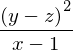

In [25]:
factor(expr)

하지만, 표현식이 소거된 형태로만 확실히 하는데만 관심이 있다면, `cancel()` 함수가 `factor()` 함수보다 더 효율적이다.

### 쪼개기

`apart()` 함수는 유리함수에 대해 [부분분수분해(Partial fraction decomposition)](https://ko.wikipedia.org/wiki/부분분수)를 수행한다.

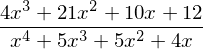

In [26]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

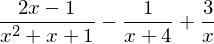

In [28]:
apart(expr)

## 삼각함수 간략화

> ### 역삼각함수 파이썬 관례 {.callout}
>
> 심파이는 역삼각함수에 대한 파이썬 작명 관례를 준수한다.
> 역함수 명칭 앞에 `a`를 덧붙이는 관례다. 예를 들어, 역코사인, 즉 아크코사인은 `acos()`가 된다.

In [29]:
acos(x)

In [30]:
cos(acos(x))

In [31]:
asin(1)

### trigsimp

삼각함수를 사용하는 표현식을 간략화하려면, `trigsimp()` 함수를 사용한다.

In [32]:
trigsimp(sin(x)**2 + cos(x)**2)

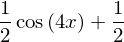

In [33]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [34]:
trigsimp(sin(x)*tan(x)/sec(x))

`trigsimp()` 함수는 쌍곡선 삼각함수에도 동작한다.

In [35]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [36]:
trigsimp(sinh(x)/tanh(x))

`simplify()` 함수와 마찬가지로, `trigsimp()` 함수는 다양한 삼각함수를 입력표현식으로 받고 나서, 휴리스틱을 사용해서 ''최선''을 찾아 뽑아낸다.

### expand_trig

삼각함수를 전개, 즉 합과 배각(double angle)를 적용하려면, `expand_trig()` 함수를 사용한다.

In [37]:
expand_trig(sin(x+y))

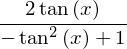

In [38]:
expand_trig(tan(2*x))

`expand_trig()` 함수는 삼각함수 표현식을 더 크게 확장시키고, `trigsimp()` 함수는 삼각함수 표현식을 더 작게 축소시키기 때문에,
`trigsimp()` 함수를 사용해서 역으로 적용시킬 수 있다.

In [39]:
trigsimp(sin(x)*cos(y) + sin(y)*cos(x))

## 거듭제곱

거듭제곱 간략화 함수를 소개하기 전에, 거듭제곱이 갖는 항등식에 대한 수학적 논의가 필요한 시점이다. 거듭제곱 지수가 만족시켜야 되는 세가지 유형의 항등식이 있다.

1. $x^a x^b = x^{a + b}$
1. $x^a y^a = (xy)^a$
1. $(x^a)^b = x^{ab}$

항등식 1은 항상 참으로 성립된다.

항등식 2는 항상 참이 아니다. 예를 들어, $x = y = -1$ 이고 $a = \frac{1}{2}$ 이면,
$x^ay^a = \sqrt{-1}\sqrt{-1} = i\cdot i = -1$이 되는 반면에, 
$(xy)^a = \sqrt{-1\cdot-1} = \sqrt{1} = 1$이 된다.
하지만, 적어도 $x$와 $y$가 음수가 아니고, $a$가 실수이면 항등식 2는 참으로 성립된다. (다른 조건아래에서 참일 수도 있다)
항등식 2가 성립하지 않는 일반적인 경우가 $\sqrt{x}\sqrt{y} \neq \sqrt{xy}$이다.

항등식 2은 항상 참이 아니다. 예를 들어, $x = -1$, $a = 2$ 이고, $b = \frac{1}{2}$ 이면, 
$(x^a)^b = {\left ((-1)^2\right )}^{1/2} = \sqrt{1} = 1$ 이 되고, 
$x^{ab} = (-1)^{2\cdot1/2} = (-1)^1 = -1$ 이 되어 성립하지 않는다.
하지만, 항등식 3은 $b$가 정수이면 참으로 성립된다. (물론, 다른 경우에도 성립된다.)
항등식 3이 성립하지 않는 두가지 일반적인 경우는 $\sqrt{x^2}\neq x$, $\sqrt{\frac{1}{x}} \neq \frac{1}{\sqrt{x}}$ 이다.

요약하면,


|     항등식            |         성립할 충분조건            |                 조건이 충족되지 않는 반례          |중요한 결과|
|-----------------------|------------------------------------|----------------------------------------------------|--------------------|
|1. $x^ax^b = x^{a + b}$|      항상 참                       |  관련없음                                          | 관련 없음 |
|2. $x^ay^a = (xy)^a$   |$x, y \geq 0$ 이고 $a \in \mathbb{R}$|$(-1)^{1/2}(-1)^{1/2} \neq (-1\cdot-1)^{1/2}$      | 일반적으로 $\sqrt{x}\sqrt{y} \neq \sqrt{xy}$  |
|3. $(x^a)^b = x^{ab}$  |$b \in \mathbb{Z}$                  |${\left((-1)^2\right )}^{1/2} \neq (-1)^{2\cdot1/2}$| 일반적으로 $\sqrt{x^2}\neq x$ 와 $\sqrt{\frac{1}{x}}\neq\frac{1}{\sqrt{x}}$ |

기억해야 될마큼 중요한데 이유는 기본디폴트 설정으로 심파이는 참이 아니면 간략화를 수행하지 않는다.

특정 가정아래서 참인 항등식과 관련된 간략화를 심파이가 수행하려면, 심볼에 대한 가정을 할 필요가 있다.
나중에 가정시스템에 대한 전체적인 논의를 할 예정이지만, 지금 당장 알고 있을 필요가 있는 것은 다음과 같다.

* 기본디폴트 설정으로 심파이 기호는 복소수($\mathbb{C}$ 요소)를 가정한다. 즉, 모든 복소수에 대해 성립하지 않는 경우, 주어진 기호에 대한 표현식에 간략화가 적용되지 않는다.
* 가정을 `symbols()` 함수에 전달함으로써 기호에 다른 가정이 주어진다.
이번 절 나머지 부분에서 `x`와 `y`를 양수, `a`와 `b`를 실수로 가정한다.
이런 경우에 무슨 일이 일어날지 시연하는데 `z`, `t`, `c`를 임의 복소수 기호로 

In [40]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

> 심파이에서 `sqrt(x)`는 `x**Rational(1,2)`를 축약한 것으로 둘은 정확하게 같은 객체다.
>
> sqrt(x) == x**Rational(1,2)  
> True

 ### powsimp
 
 `powsimp()` 함수는 위에 정의된 항등식 1,2 에 왼쪽에서 오른쪽으로 적용된다.

In [41]:
powsimp(x**a*x**b)

In [42]:
powsimp(x**a*y**a)

`powsimp()` 함수는 적법하지 않는 경우 간략화를 거부하는 것에 주목한다.

In [44]:
powsimp(t**c*z**c)

간략화를 적용하고자 하지만, 가정으로 인해 난잡하게 되는 것을 원치 않는 경우, `force=True` 플래그를 전달할 수도 있다. 이를 통해 간략화가 가정에 관계없이 진행되게 된다.

In [45]:
powsimp(t**c*z**c, force=True)

일부 경우에, 특히 지수가 정수 혹은 유리수이며 항등식 2가 성립하는 경우, 자동으로 적용된다.

In [46]:
(z*t)**2

In [47]:
sqrt(x*y)

### `expand_power_exp` / `expand_power_base`

`expand_power_exp()` 와 `expand_power_base()` 함수는 오른쪽에서 왼쪽으로 항등식 1,2에 각각 적용된다.

In [48]:
expand_power_exp(x**(a+b))

In [49]:
expand_power_base((x*y)**a)

`powsimp()` 와 마찬가지로, 항등식 2는 적법하지 않는 경우 적용되지 않는다.

In [52]:
expand_power_base((z*t)**c)

`powsimp()` 함수와 마찬가지로 `force=True` 인자를 사용해서 가정을 조작할 필요없이 전개를 강제할 수 있다.

In [53]:
expand_power_base((z*t)**c, force=True)

항등식 2와 마찬가지로, 항등식 1은 거듭제곱이 숫자면 자동으로 적용된다. 따라서 `expand_power_exp()` 함수로 별도 작업을 할 필요가 없다.

In [54]:
x**2*x**3

In [55]:
expand_power_exp(x**5)

### powdenest

`powdenest()` 함수는 왼쪽에서 오른쪽으로 항등식 3에 적용된다.

In [56]:
powdenest((x**a)**b)

In [57]:
powdenest((z**a)**b)

이전과 마찬가지로 `force=True` 인자를 넣어 수동으로 강제적용시킬 수 있다.

In [58]:
powdenest((z**a)**b, force=True)

## 지수와 로그

> 파이썬과 프로그래밍 언어 대부분처럼, 심파이에서 `log`는 자연로그다. `ln`으로도 알려져있다. 심파이에서 자동으로 `ln=log` 별칭을 제공한다.  
> `>>>` ln(x)  
log(x)

로그도 지수와 유사한 이슈가 있다. 로그와 관련된 주요 등식 두개는 다음과 같다.

1. $log(xy) = log(x) + log(y)$
1. $log(x^n ) = n log(x)$

임의 복소수 $x$와 $y$에 대해 어떤 항등식도 참이 아니다. 왜냐하면, 복소수 알고리즘에 대한 복소 평면에 분지절단(branch cut) 때문이다. 하지만, 등식이 성립하는 충분조건은 $x$와 $y$가 양수이며 $n$이 실수인 경우다.

In [59]:
x, y = symbols('x y', positive = True)
n = symbols('n', real=True)

등식 $\log{\left (\frac{x}{y}\right )} = \log(x) - \log(y)$은 등식 1, 2의 특수한 경우로 $\log{\left (\frac{x}{y}\right )} = \log{\left (x\cdot\frac{1}{y}\right )} = \log(x) + \log{\left(y^{-1}\right )} = \log(x) - \log(y)$ 이 되고, $x$ 와 $y$ 가 양수이면 성립하지만, 일반적으로 성립되는 것은 아니다.

$\log{\left( e^x \right)} = x$ 등식은 $\log{\left ( e^x \right)} = x\log(e) = x$ 에서 나온다. 따라서, $x$ 가 실수이면 성립된다. (임의 복소수 $x$ 에 대해서는 성립되지 않는 것을 확인될 수 있다. 예를 들어, $\log{\left (e^{x + 2\pi i}\right)} = \log{\left (e^x\right )} = x
\neq x + 2\pi i$)

### expand_log

왼쪽에서 등식 1,2 를 적용하려면, `expand_log()`를 사용한다.
늘 그렇지만, 등식은 적법하지 않는 경우 적용되지 않는다.

In [60]:
expand_log(log(x*y))

In [61]:
expand_log(log(x/y))

In [63]:
expand_log(log(x**2))

In [64]:
expand_log(log(x**n))

In [65]:
expand_log(log(z*t))

`powsimp()`과 `powdenest()` 함수와 마찬가지로, `expand_log()`도 `force` 선택옵션으로 가정을 무시하는데 사용한다.

In [66]:
expand_log(log(z**2))

In [67]:
expand_log(log(z**2), force=True)

### logcombine

오른쪽에서 왼쪽으로 항등식 1, 2를 적용하려면, `logcombine()` 함수를 사용한다.

In [68]:
logcombine(log(x) + log(y))

In [69]:
logcombine(n*log(x))

In [70]:
logcombine(n*log(z))

`logcombine()` 함수에 `force` 선택옵션을 사용해서 가정을 무시하고 적용할 수도 있다.

In [71]:
logcombine(n*log(z), force=True)

## 특수 함수

심파이에는 수십가지 특수 함수가 구현되어 있는데, 조합론에 나온 함수부터 수리물리학까지 아우른다.

심파이에 포함된 특수 함수 목록과 연관된 문서는 [Functions Module](http://docs.sympy.org/latest/modules/functions/index.html#functions-contents) 웹페이지를 참조한다.

심파이에 구현된 몇가지 특수함수를 소개한다.

`x`, `y`, `z`를 정규, 복소수 기호로 정의하고 앞절에서 제시한 가정을 무시한다.
`k`, `m`, `n`도 함께 정의한다.

In [72]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

[차례곱(factorial)](http://en.wikipedia.org/wiki/Factorial) 함수는 `factorial`이다.
`factorial(n)`은 $n!= 1\cdot2\cdots(n - 1)\cdot n$을 나타낸다. $n!$은 $n$개 확연히 구분되는 항목에 대한 순열을 나타낸다.

In [73]:
factorial(n)

[이항계수(binomial coefficient)](http://en.wikipedia.org/wiki/Binomial_coefficient) 함수는 `binomial`이다.
`binomial(n, k)`는 $\binom{n}{k}$로 표현되고, $n$개 확연히 구분되는 항복으로부터 $k$ 개 항목을 선택하는 방법의 수를 나타낸다. $nCk$로도 작성하고 ''$n$ choose $k$''라고 발음한다.

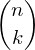

In [74]:
binomial(n, k)

차례곱 함수는 [감마함수(gamma function)](http://en.wikipedia.org/wiki/Gamma_function)과 밀접하게 관련되어 있다. `gamma(z)`는 $\Gamma(z) = \int_0^\infty t^{z - 1}e^{-t}\,dt$ 으로 표현되고 양의 정수 $z$에 대해 $(z-1)!$과 같다.

In [75]:
gamma(z)

[일반화 초기하 함수(Generalized hypergeometric function)](http://en.wikipedia.org/wiki/Generalized_hypergeometric_function)는 
`hyper`다. `hyper([a_1, ..., a_p], [b_1, ..., b_q], z)`는 ${}_pF_q\left(\begin{matrix} a_1, \dots, a_p \\ b_1, \dots, b_q \end{matrix}
\middle| z \right)$ 표현된다. 가장 일반적인 경우가 ${}_2F_1$ 으로 [보통 초기하 함수(ordinary hypergeometric function)](http://en.wikipedia.org/wiki/Hypergeometric_function)를 흔히 지칭한다.

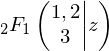

In [77]:
hyper([1, 2], [3], z)

### 다시 고쳐쓰기

특수 함수를 다루는 일반적인 방식은 다른 것에 관해서 다시 작성하는 것이다.
특수 함수 뿐만 아니라, 심파이에 어떤 함수에도 해당된다.함수에 관해 표현식을 다시 작성하려면, 
`expr.rewrite(function)` 메쏘드를 사용한다. 예를 들어,

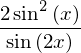

In [78]:
tan(x).rewrite(sin)

In [79]:
factorial(x).rewrite(gamma)

좀더 고급 다시 작성하는 방법에 대한 도움말은 [Advanced Expression Manipulation](http://docs.sympy.org/latest/tutorial/manipulation.html#tutorial-manipulation)을 참조한다.

### expand_func

항등식에 관해서 특수 함수를 전개하려면, `expand_func()` 함수를 사용한다. 예를 들어,

In [80]:
expand_func(gamma(x + 3))

### hyperexpand

`hyper`를 좀더 표준 함수로 다시 작성하려면, `hyperexpand()`를 사용한다.

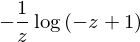

In [81]:
hyperexpand(hyper([1,1],[2],z))

`hyperexpand()` 함수도 좀더 일반적인 Meijer G-함수에 동작한다.

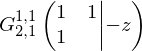

In [82]:
expr = meijerg([[1],[1]], [[1],[]], -z)
expr

In [83]:
hyperexpand(expr)

### combsimp

조합 표현식을 간략화는데, `combsimp()` 함수를 사용한다.

In [84]:
combsimp(factorial(n)/factorial(n - 3))

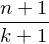

In [85]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

`combsimp()`함수는 `gamma` 함수를 갖는 표현식도 간략화한다.

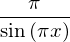

In [86]:
combsimp(gamma(x)*gamma(1-x))

## 예제: 연분수

심파이를 사용해서 연분수(continued fraction)을 살펴보자.
[연분수(continued fraction)](http://en.wikipedia.org/wiki/Continued_fraction)는 다음 형태를 갖는 표현식이다.

$ a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{ \ddots + \cfrac{1}{a_n}}}}$

$a_0, \ldots, a_n$ 은 정수고, $a_1, \ldots, a_n$ 은 양수다.
연분수는 무한일 수도 있지만, 무한 객체를 컴퓨터로 표현하는 것이 더 어려워서, 여기서는 유한인 경우만 살펴본다.

상기와 같은 연분수는 $[a_0; a_1, \ldots, a_n]$ 리스트 형태로 표현된다.
간단한 함수를 작성해서 이러한 리스트를 연분수 형태로 변환하자.
리스트에서 연분수를 작성하는 가장 쉬운 방법은 반대방향으로 작업하는 것이다.
정의에 대한 명백한 대칭성에도 불구하고, 첫번째 요소, $a_0$는 나머지와 다르게 보통 처리된다.

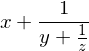

In [87]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr
list_to_frac([x, y, z])

파이썬 정수를 인수로 전달할지라도, `list_to_frac` 함수에 `integer(0)`를 사용해서 결과는 항상 심파이 객체다. 

In [90]:
list_to_frac([1,2,3,4])

모든 유한 연분수는 유리수지만 여기서 기호에 관심이 있어, 기호 연분수를 생성하자.
지금까지 사용한 `symbols()` 함수는 숫자 번호 매긴 기호를 생성하는 축약법이 있다.
`symbols('a0:5)` 는 `a0`, `a1`, ..., `a5` 기호를 생성한다.

In [91]:
syms = symbols('a0:5')
syms

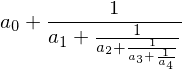

In [92]:
a0, a1, a2, a3, a4 = syms
frac = list_to_frac(syms)
frac

상기 형태는 연분수를 이해하는데 도움이 된다. `cancel()` 함수를 사용해서 표준 유리함수 형태로 표현해 본다.

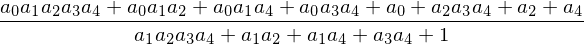

In [93]:
frac = cancel(frac)
frac

`frac`이 소거된 형태로 주어졌다고 가정하자.
사실, 분수는 어떤 형태로도 주어질 수 있지만, `cancel()` 함수로 위와 같은 표준형으로 항상 표현할 수 있다.
연분수 형태로 다시 작성될 수 있다는 사실을 인지한다고 가정하자.
심파이로 어떻게 작업할 수 있을까?
연분수는 재귀적인 $c + \frac{1}{f}$ 형태로, $c$는 정수가 되고, $f$는 (더 작은) 연분수가 된다.
표현식을 이런 형태로 작성할 수 있으면, 재귀적으로 $c$ 각각을 뽑아내서 리스트에 추가할 수 있다.
그리고 나서, `list_to_frac()` 함수로 연분수를 얻을 수 있게 된다.

여기서 중요한 점은 표현식을 $c$에 관해서 부분 분수분해 작업을 통해서 $c + \frac{1}{f}$ 형태로 전환할 수 있다는 것이다. $f$가 $c$를 포함하고 있지 않기 때문이다.
이것이 의미하는 바는 `apart()` 함수를 사용할 필요가 있다는 점이다.
`apart()` 함수를 사용해서 해당 항을 뽑아내고 나서 표현식에서 빼기하고 $f$ 부분을 얻는데 역수를 취한다.

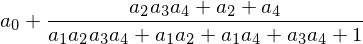

In [94]:
l = []
frac = apart(frac, a0)
frac

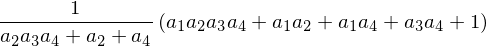

In [95]:
l.append(a0)
frac = 1/(frac -a0)
frac

이제 이와 같은 과정을 반복한다.

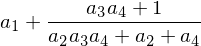

In [96]:
frac = apart(frac, a1)
frac

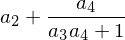

In [97]:
l.append(a1)
frac = 1/(frac - a1)
frac = apart(frac, a2)
frac

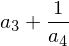

In [98]:
l.append(a2)
frac = 1/(frac - a2)
frac = apart(frac, a3)
frac

In [99]:
l.append(a3)
frac = 1/(frac - a3)
frac = apart(frac, a4)
frac

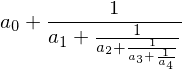

In [100]:
l.append(a4)
list_to_frac(l)

물론 이번 연습문제는 가치가 없다. 왜냐하면, 이미 `frac`이 `list_to_frac([a0, a1, a2, a3, a4])`이라는 것을 알고 있다. 그래서 다음 연습문제를 시도해 보자. 기호 리스트를 받아 임의로 순서를 바꾸고, 소거된 연분수 형태를 생성하자. 최초 리스트를 복원할 수 있는지도 살펴보자. 예를 들어,

In [109]:
import random
l = list(symbols('a0:5'))
random.shuffle(l)
orig_frac = cancel(list_to_frac(l))
del l

`frac`에서 `l`을 복원해 본다.
훔쳐보는 유혹을 없애고자 마지막에 `l`을 삭제했다.
(여러분이 생성한 리스트와 `cancel(list_to_frac(l))` 함수를 호출해서 마지막에 생성된 정답을 검사할 수 있고, `orig_frac` 리스트와 비교도 가능하다)

각 단계마다 `apart()` 함수에 어떤 기호를 전달할지 해결하는 방법을 생각해 낼 수 있는지 알아보자.
(힌트: 소거될 때 $a_0 + \frac{1}{a_1 + \cdots}$ 공식에 $a_0$에 어떤 일이 일어나는지 생각해보라)